### Importing the libraries

In [341]:
## Data cleaning
import numpy as np
import pandas as pd


## Data Visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')

### importing the dataset

In [342]:
datas = pd.read_csv("diabetes.csv")

In [343]:
print(datas.dtypes)
# print(datas.head())

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [344]:
datas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [345]:
datas.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [346]:
## removing the NAN values
print(datas.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


So we don't have any missing observations so it is safe to assume that the 0s are representing missing observations. One thing we could do is change those 0s to NaN and then drop those NaN. Another thing we could do is change those 0s to the mean or medium. Before we decide let's look at the amount of zeros in the data.

In [347]:
(datas == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

There are lots of zeros..Insulin has the most zeros with 374.Which is 48% of the observations for Insulin. The data should be more realistic than replacing those NaN with the mean or median. Next we will convert the zeros to NaN and then drop those NaN

In [348]:
## changing the 0's to Nan values the features defined in zeros
datas[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] =  datas[['Glucose', 'BloodPressure', 
                                                                        'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


#dropping the newly convertered NaNs
datas = datas.dropna()

# looking at the first 20 rows
datas.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0


In [349]:
datas.shape

(392, 9)

In [350]:
datas.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [351]:
(datas == 0).sum()

Pregnancies                  56
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     262
dtype: int64

Data is now fully cleaned. We have no NaNs and no zeros. We are left with only 392 observations. Next let's visualize the data

## Data Visualization

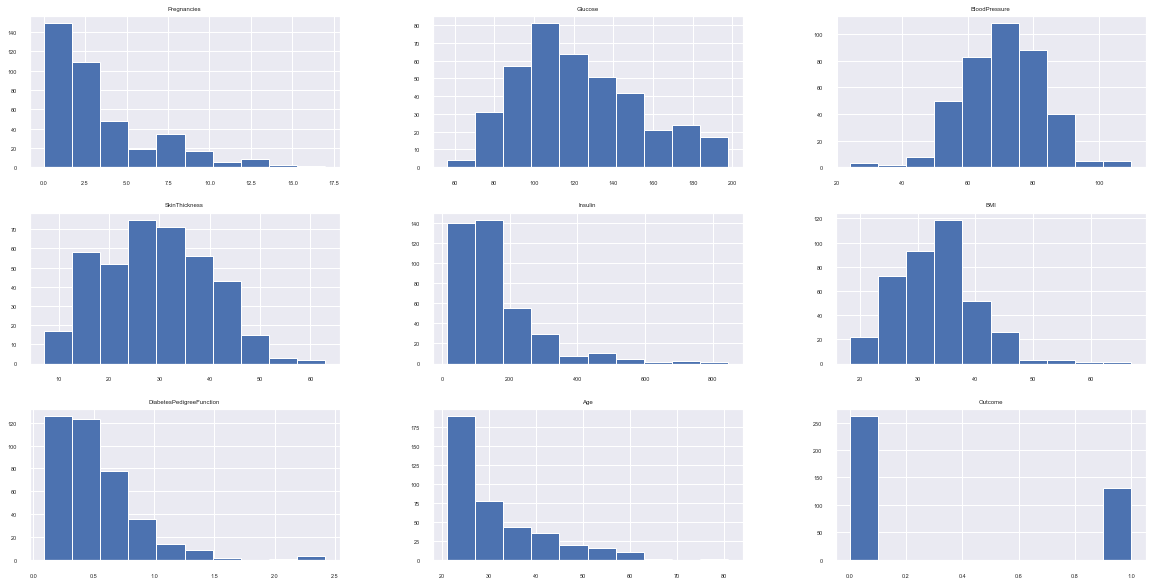

In [352]:
datas.hist(figsize=(20,10))
plt.show()

With histplot it shows, Glucose, SkinThickness, Blood Pressure are more of Normally distributed Data features

### Pair Plot

let us draw pairplot according to Outcome

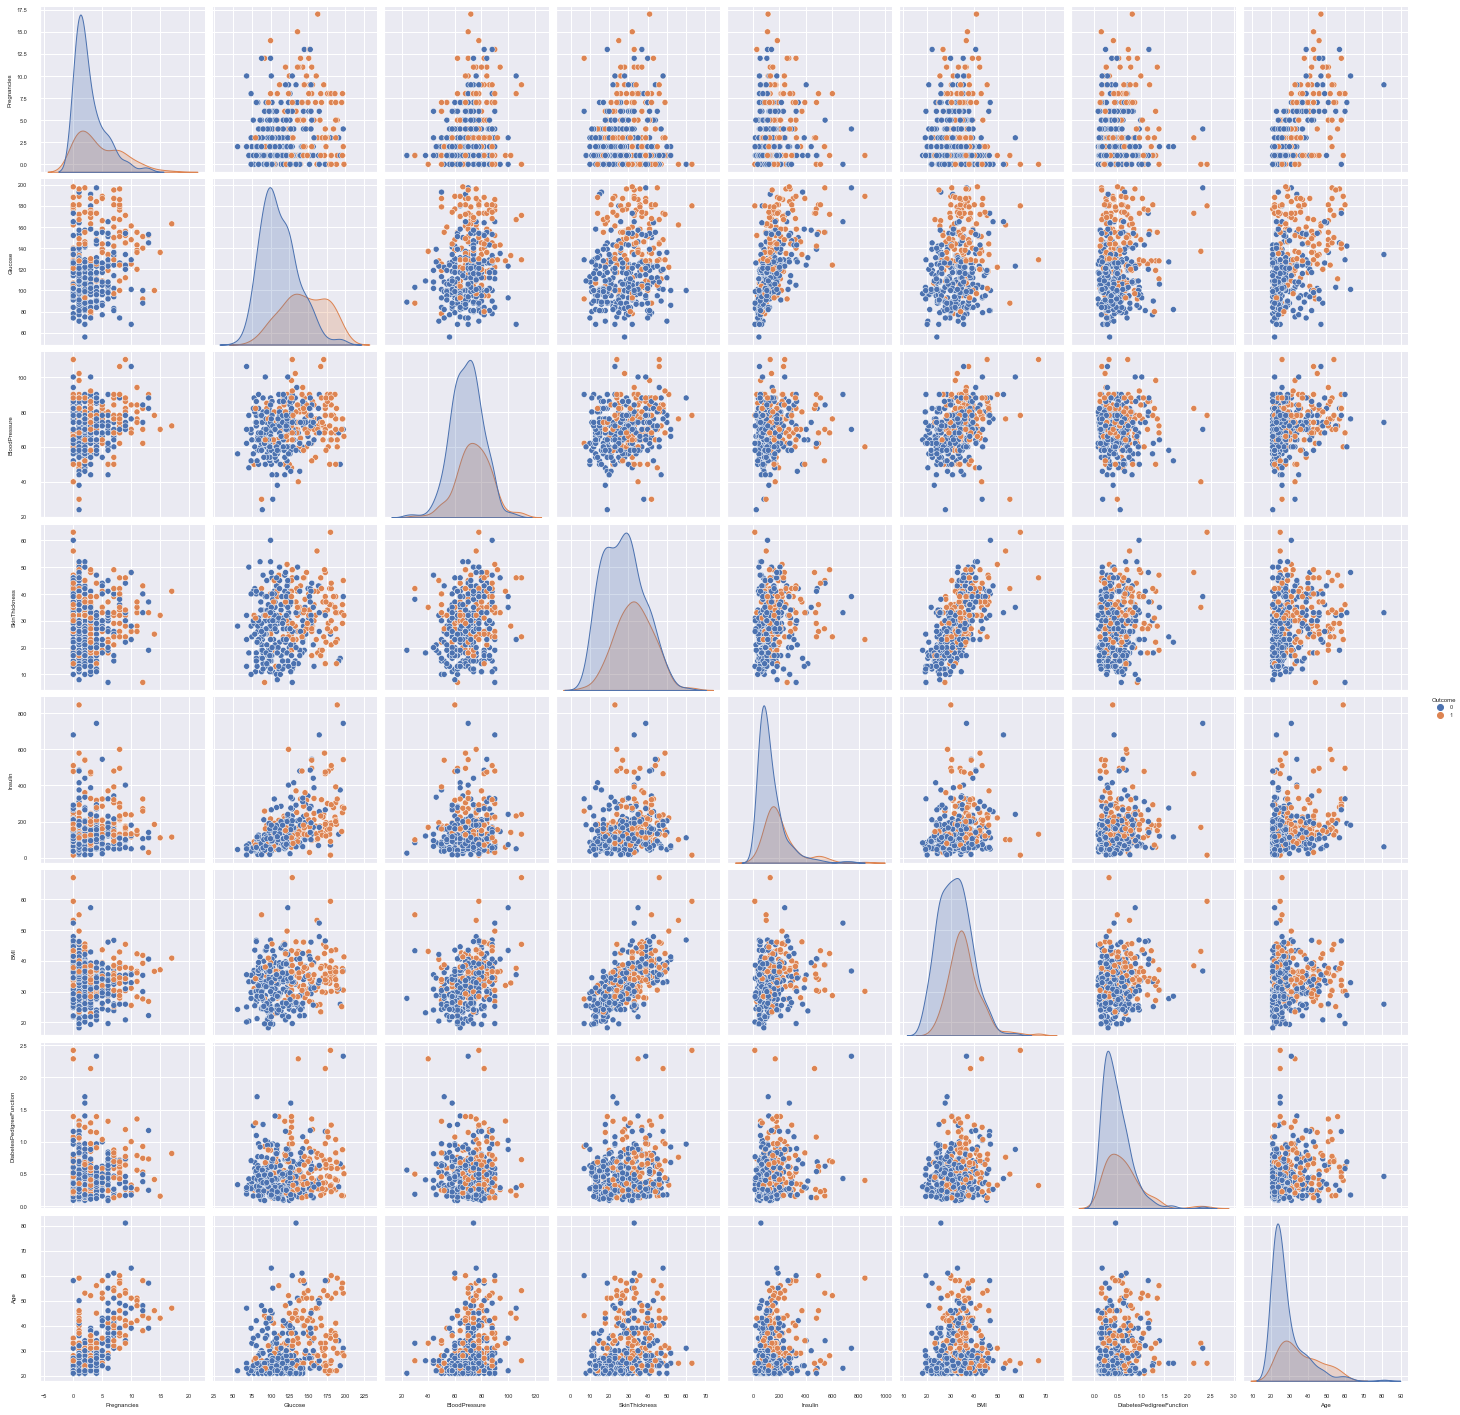

In [353]:
sns.pairplot(data=datas,hue='Outcome')

<Figure size 720x480 with 0 Axes>

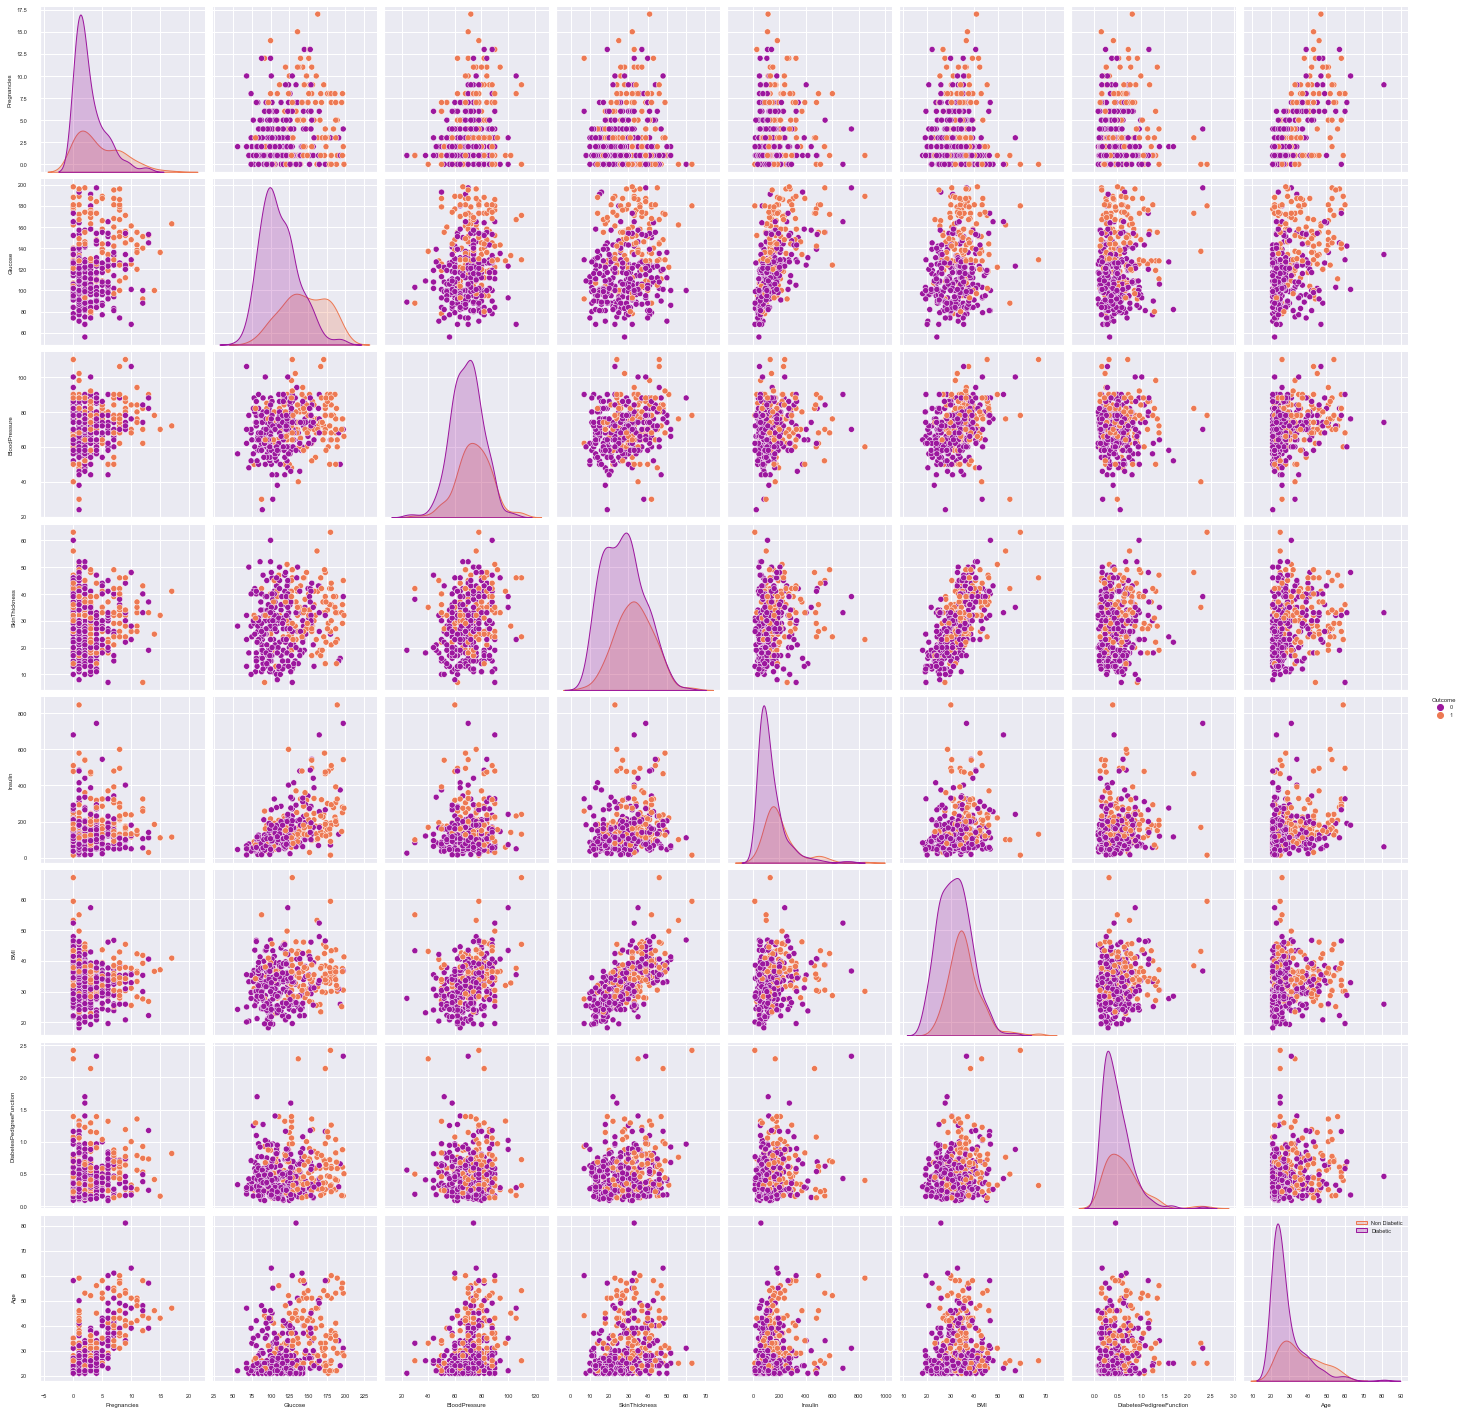

In [354]:
plt.figure(dpi = 120)
sns.pairplot(datas,hue = 'Outcome',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

<Figure size 720x480 with 0 Axes>

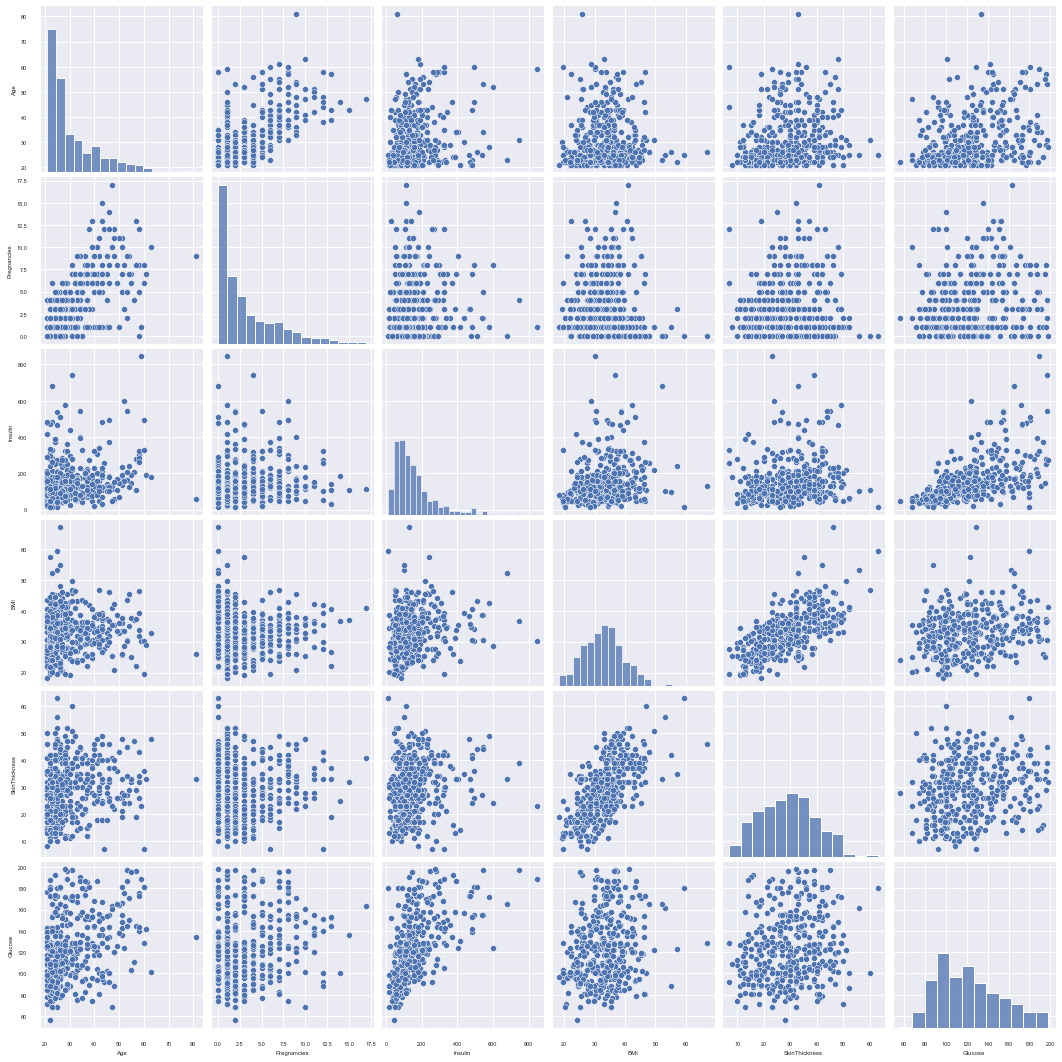

In [355]:
plt.figure(dpi = 120)
sns.pairplot(datas[['Age','Pregnancies','Insulin','BMI','SkinThickness','Glucose']])
plt.show()

We Can derive on the conclusion as Glucose is high with the correaltion to outcome

<AxesSubplot:xlabel='variable', ylabel='value'>

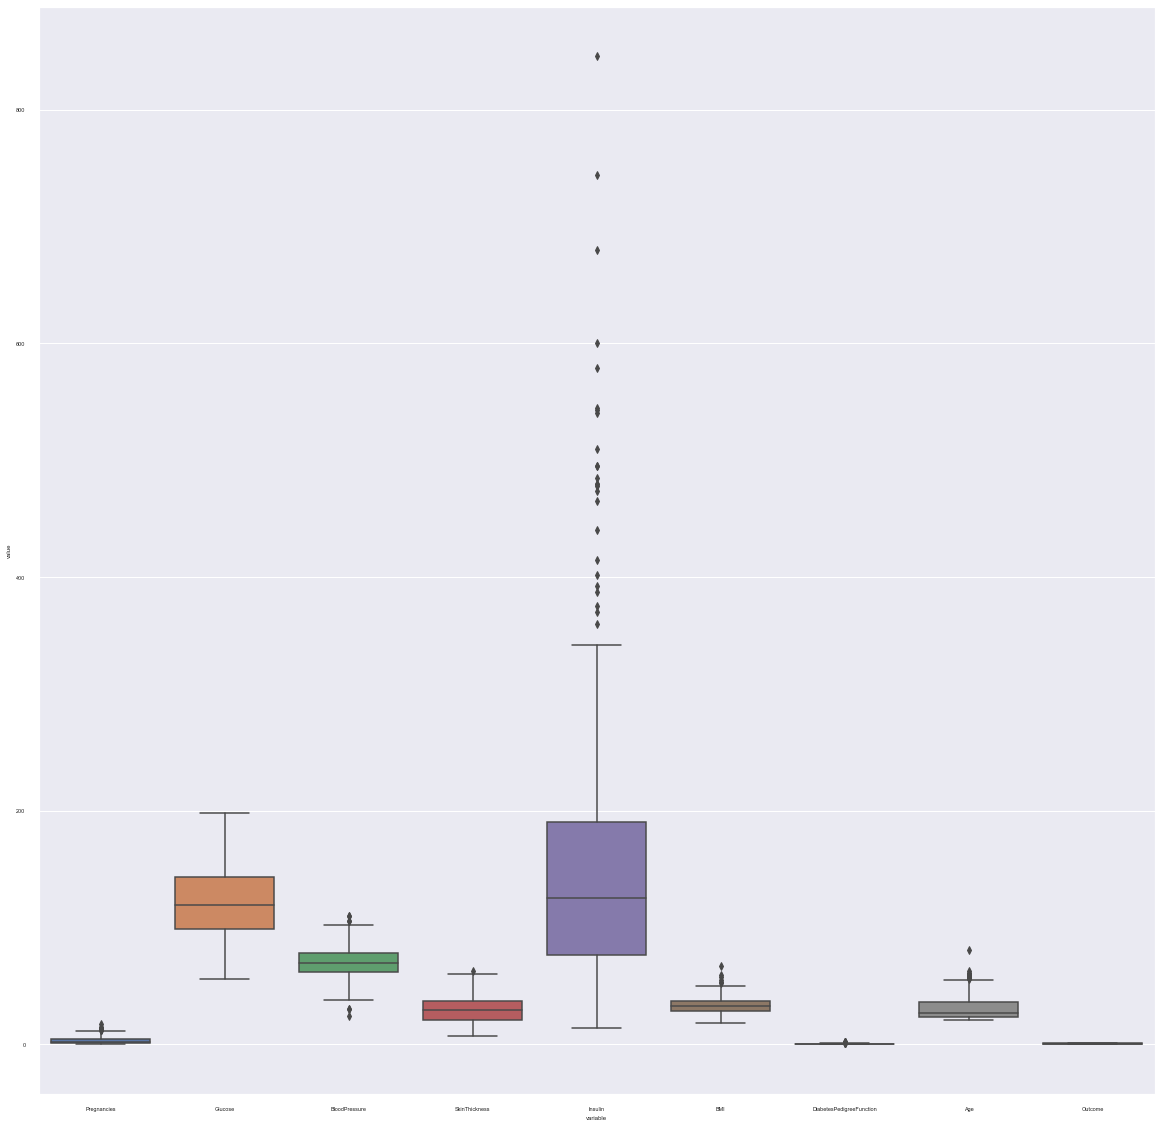

In [356]:
plt.figure(figsize=(20,20))
sns.boxplot(x='variable',y='value',data=pd.melt(datas))

We can visualize the insulin in diabetes dataset having maximum outliers 

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

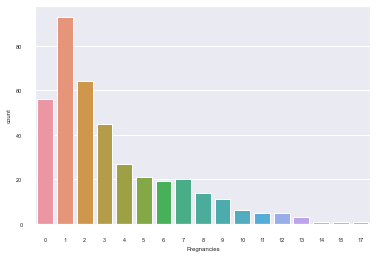

In [357]:
sns.countplot(x = "Pregnancies", data = datas)

<AxesSubplot:xlabel='Age', ylabel='count'>

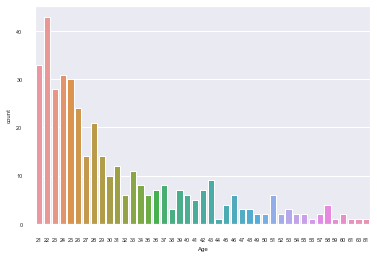

In [358]:
sns.set(font_scale = 0.5)
sns.countplot(x = "Age", data = datas)

### Analysis Of Categorical Variable

In [359]:
more_cat_cols = [col for col in datas.columns if len(datas[col].unique()) < 10]
print('Number of Categorical Variable : ', len(more_cat_cols))
print(more_cat_cols)

Number of Categorical Variable :  1
['Outcome']


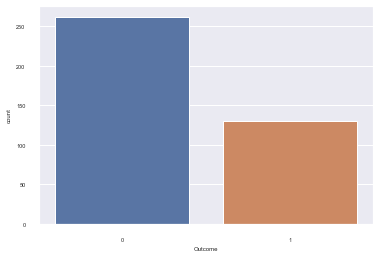

In [360]:
## Displaying Categorical with column graph
sns.countplot(x="Outcome", data=datas)
plt.show()

## Analysis Of Numerical Variable

In [361]:
datas.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
Glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
BloodPressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
SkinThickness,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
Insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
DiabetesPedigreeFunction,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
Outcome,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


In [362]:
datas.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
Pregnancies,392.0,3.301020,3.211424,0.000,0.00000,0.0000,1.00000,2.0000,5.000,6.000,8.0000,10.00000,13.00000,17.00
Glucose,392.0,122.627551,30.860781,56.000,81.00000,87.0000,99.00000,119.0000,143.000,151.000,170.9000,181.00000,196.00000,198.00
BloodPressure,392.0,70.663265,12.496092,24.000,50.00000,56.0000,62.00000,70.0000,78.000,80.000,86.0000,90.00000,102.36000,110.00
SkinThickness,392.0,29.145408,10.516424,7.000,13.00000,15.0000,21.00000,29.0000,37.000,39.000,43.0000,46.45000,52.00000,63.00
Insulin,392.0,156.056122,118.841690,14.000,42.55000,51.1000,76.75000,125.5000,190.000,210.000,292.8000,396.50000,580.89000,846.00
BMI,392.0,33.086224,7.027659,18.200,22.25500,24.4200,28.40000,33.2000,37.100,38.200,42.0700,45.24500,53.36200,67.10
DiabetesPedigreeFunction,392.0,0.523046,0.345488,0.085,0.15355,0.1834,0.26975,0.4495,0.687,0.729,0.9422,1.16035,1.73842,2.42
Age,392.0,30.864796,10.200777,21.000,21.00000,22.0000,23.00000,27.0000,36.000,39.000,46.0000,52.45000,60.00000,81.00
Outcome,392.0,0.331633,0.471401,0.000,0.00000,0.0000,0.00000,0.0000,1.000,1.000,1.0000,1.00000,1.00000,1.00


In [363]:
## number of numerical variables in the dataset
num_cols = [col for col in datas.columns if datas[col].dtypes != 'O']
print('Number of numerical variables: ', len(num_cols))

Number of numerical variables:  9


In [364]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

### Visualization Of Numerical Varibales

In [365]:
def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")

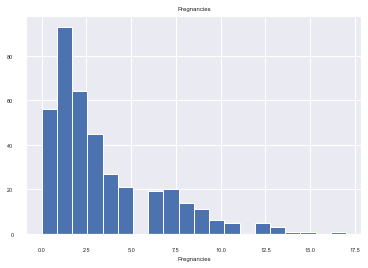

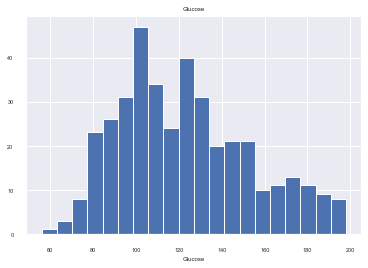

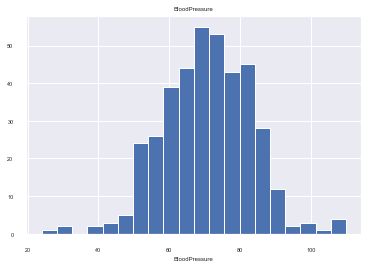

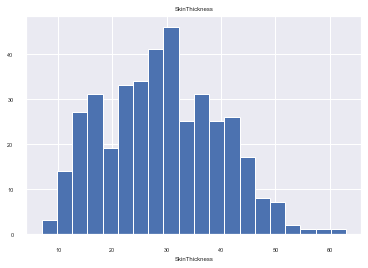

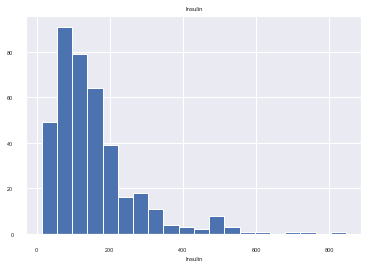

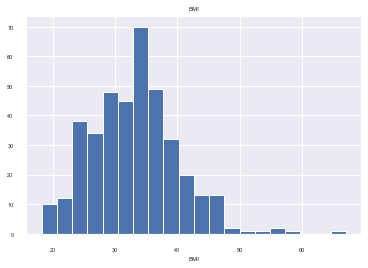

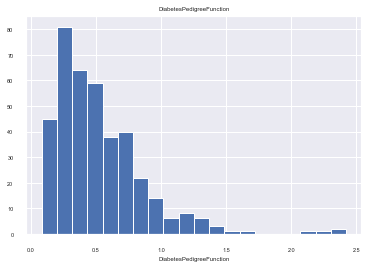

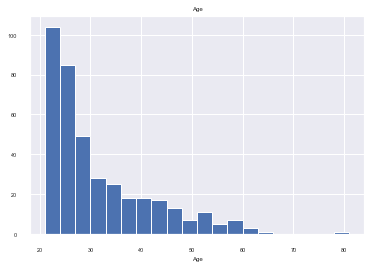

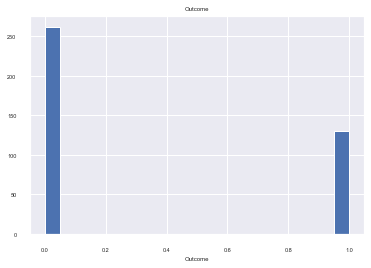

9 variables have been plotted


In [366]:
hist_for_nums(datas, num_cols)

### Analysis Of Dependent variable (Target Analysis)

In [367]:
datas["Outcome"].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

### Plotting PIE PLOT for Diabetes result

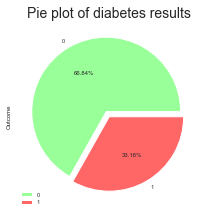

In [368]:
explode=(0.08,0)

datas['Outcome'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(3,3),explode=explode,colors=['#99ff99','#ff6666'])

plt.title("Pie plot of diabetes results", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

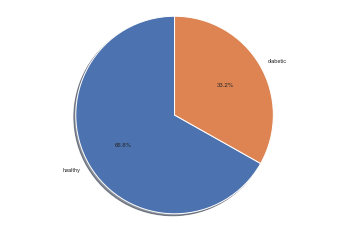

In [369]:
fig1, ax1 = plt.subplots()
ax1.pie(datas["Outcome"].value_counts(),  labels=['healthy','diabetic'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

As we can see from the values above,that there is an imbalance between the classes of the dependent variable.

### Correlation

<Figure size 2160x1440 with 0 Axes>

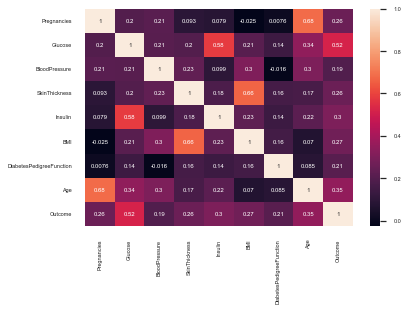

<Figure size 2160x1440 with 0 Axes>

In [370]:
sns.heatmap(datas.corr(),annot=True)
plt.figure(figsize=(30,20))

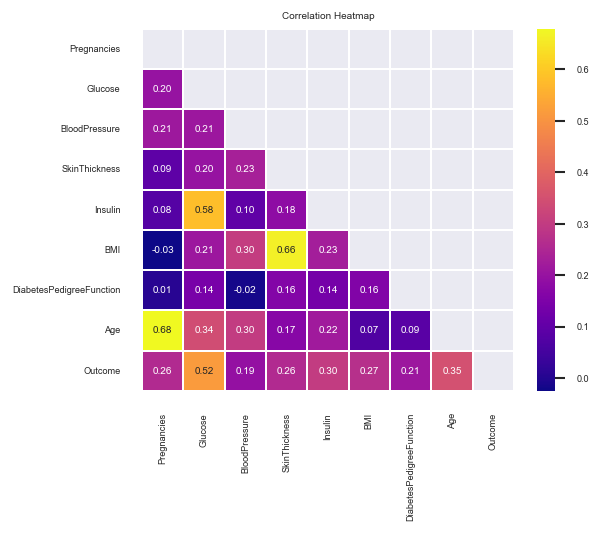

In [371]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(datas.corr(),dtype = bool))
sns.heatmap(datas.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [372]:
datas.corr()
a = datas.corr()['Outcome'].sort_values(ascending=False)
print(a)

Outcome                     1.000000
Glucose                     0.515703
Age                         0.350804
Insulin                     0.301429
BMI                         0.270118
Pregnancies                 0.256566
SkinThickness               0.255936
DiabetesPedigreeFunction    0.209330
BloodPressure               0.192673
Name: Outcome, dtype: float64


Correlation of variables with Heatmap

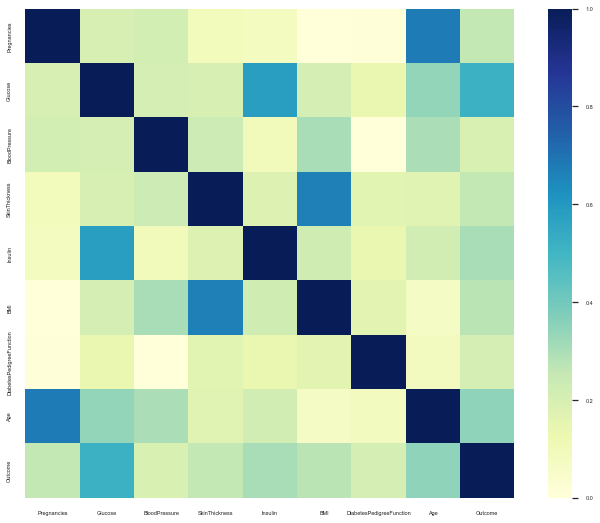

' there is no multicollinearity among the independent variables '

In [373]:
corrmat = datas.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = 0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show()
""" there is no multicollinearity among the independent variables """

### Feature Engineering

In [374]:
def bp_group(row):
    
    if row["BloodPressure"]<60:
        return '0'
    
    elif row["BloodPressure"]>60 and row["BloodPressure"]<80:
        return '1'
    
    elif row["BloodPressure"]>80 and row["BloodPressure"]<90:
        return '2'
    
    else:
        return '3'
    

datas['BloodPressure']== datas.apply(bp_group, axis=1)

3      False
4      False
6      False
8      False
13     False
       ...  
753    False
755    False
760    False
763    False
765    False
Length: 392, dtype: bool

In [375]:
def bmi_group(row):
    
    if row['BMI'] < 18.5:
        return '0'
    
    elif row['BMI'] > 18.5 and row['BMI'] < 25:
        return '1'
    
    elif row['BMI'] > 25 and row['BMI'] < 30:
        return '2' 
    
    elif row['BMI'] > 30 and row['BMI'] < 40:
        return '3'
    
    else:
        return '4'

datas['bmi_status'] = datas.apply(bmi_group,axis=1)

In [376]:
def age_group(row):
    
    if row['Age'] < 30:
        return '0'
    
    elif row['Age'] > 30 and row['Age'] > 62:
        return '1'
    
    else:
        return '2'

datas['age_group'] = datas.apply(age_group,axis=1)

In [377]:
def number_preg(row):
    
    if row['Pregnancies'] < 2:
        return '0'
    
    elif row['Pregnancies'] > 2 and row['Pregnancies'] < 5:
        return '1'
    
    else:
        return '2'
    
datas['number_preg'] = datas.apply(number_preg,axis=1)

In [378]:
# ratio between glucose and insulin.
datas['glucose_insulin_ratio'] = datas['Glucose'] / datas['Insulin']

In [379]:
# ration between BMI and skin thickness
datas['bmi_skinthickness_ratio'] = datas['BMI'] / datas['SkinThickness']

In [380]:
datas['glucose_and_DPF'] = datas['Glucose'] * datas['DiabetesPedigreeFunction']

In [381]:
datas['age_and_DPF'] = datas['Age'] * datas['DiabetesPedigreeFunction']

In [382]:
datas.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_status,age_group,number_preg,glucose_insulin_ratio,bmi_skinthickness_ratio,glucose_and_DPF,age_and_DPF
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,2,0,0,0.946809,1.221739,14.863,3.507
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,4,2,0,0.815476,1.231429,313.456,75.504
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,3,0,1,0.886364,0.968750,19.344,6.448
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,3,2,2,0.362799,0.677778,31.126,8.374
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,3,2,0,0.223404,1.308696,75.222,23.482
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1,2,2,2,0.948571,1.357895,97.442,29.937
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1,4,2,0,0.513043,0.974468,65.018,17.081
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0,4,2,0,1.240964,1.139474,18.849,6.039
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1,3,2,0,1.197917,1.153333,60.835,16.928
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0,3,0,1,0.536170,0.958537,88.704,19.008


### Model

Scaling of data

In [383]:
# creating our X and y
#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

y = datas['Outcome']
x = datas.drop(columns = 'Outcome')

#creating our min max scaler
scaled = MinMaxScaler()

# mix-max scale the data between 0 and 1
x_scaled = scaled.fit_transform(x)

#changing back into a dataframe
x = pd.DataFrame(x_scaled, columns = x.columns)
        
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,bmi_status,age_group,number_preg,glucose_insulin_ratio,bmi_skinthickness_ratio,glucose_and_DPF,age_and_DPF
0,0.058824,0.232394,0.488372,0.285714,0.096154,0.202454,0.035118,0.000000,0.50,0.0,0.0,0.058507,0.180386,0.015617,0.018110
1,0.000000,0.570423,0.186047,0.500000,0.185096,0.509202,0.943469,0.200000,1.00,1.0,0.0,0.048125,0.183305,0.677696,0.969143
2,0.176471,0.154930,0.302326,0.446429,0.088942,0.261759,0.069807,0.083333,0.75,0.0,0.5,0.053729,0.104185,0.025553,0.056959
3,0.117647,0.992958,0.534884,0.678571,0.635817,0.251534,0.031263,0.533333,0.75,1.0,1.0,0.012342,0.016542,0.051677,0.082400
4,0.058824,0.936620,0.418605,0.285714,1.000000,0.243354,0.134047,0.633333,0.75,1.0,0.0,0.001323,0.206578,0.149452,0.281967


In [384]:
#spliting the data between X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

#printing the shape of each set
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(313, 15)
(79, 15)
(313,)
(79,)


In [385]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#machine learning metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [386]:
#model explaining
import eli5
from eli5.sklearn import PermutationImportance

#result table
from tabulate import tabulate

### Logistic Regression

In [387]:
from sklearn.linear_model import LogisticRegression

## craeting logistic reg model 
logistic_model = LogisticRegression(random_state=0)


## train the model
logistic_model.fit(x_train, y_train)


## making prediction
log_pred = logistic_model.predict(x_test)

## getting our results
log_r_f1 = f1_score(y_test, log_pred)
log_r_auc = roc_auc_score(y_test, log_pred)
log_r_acc = accuracy_score(y_test, log_pred)

## printing the classification report
print(classification_report(y_test, log_pred))

## showing the feature importance to the predictions
logistic_prem = PermutationImportance(logistic_model, random_state=0).fit(x_test, y_test)
eli5.show_weights(logistic_prem, feature_names = x_test.columns.tolist())

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        55
           1       0.67      0.67      0.67        24

    accuracy                           0.80        79
   macro avg       0.76      0.76      0.76        79
weighted avg       0.80      0.80      0.80        79



Weight,Feature
0.0886 ± 0.0816,Glucose
0.0253 ± 0.0226,DiabetesPedigreeFunction
0.0228 ± 0.0189,age_and_DPF
0.0228 ± 0.0101,BloodPressure
0.0203 ± 0.0124,SkinThickness
0.0203 ± 0.0258,glucose_and_DPF
0.0177 ± 0.0258,Age
0.0127 ± 0.0000,glucose_insulin_ratio
0.0127 ± 0.0160,Insulin
0.0076 ± 0.0124,bmi_skinthickness_ratio


### ROC Curve for Logistic Regression

In [388]:
from sklearn.metrics import roc_curve
y_pred_proba = logistic_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

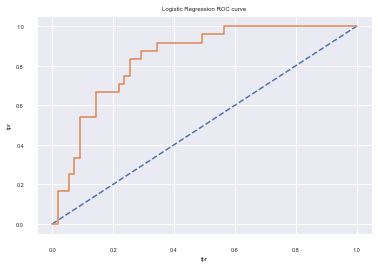

In [389]:
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

### Random Forest

In [390]:
from sklearn.ensemble import RandomForestClassifier

## creating the random forest model
rf_model = RandomForestClassifier(random_state=0)

## train the model
rf_model.fit(x_train, y_train)


## making prediction
rf_pred = rf_model.predict(x_test)

## getting our results
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
rf_acc = accuracy_score(y_test, rf_pred)

## printing the classification report
print(classification_report(y_test, rf_pred))

## showing the feature importance to the predictions
rf_prem = PermutationImportance(rf_model, random_state=0).fit(x_test, y_test)
eli5.show_weights(rf_prem, feature_names = x_test.columns.tolist())

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        55
           1       0.56      0.58      0.57        24

    accuracy                           0.73        79
   macro avg       0.69      0.69      0.69        79
weighted avg       0.74      0.73      0.74        79



Weight,Feature
0.0608 ± 0.0741,Glucose
0.0051 ± 0.0124,bmi_status
0.0000 ± 0.0160,BloodPressure
-0.0025 ± 0.0336,Age
-0.0051 ± 0.0304,bmi_skinthickness_ratio
-0.0051 ± 0.0124,glucose_insulin_ratio
-0.0051 ± 0.0203,number_preg
-0.0051 ± 0.0203,Insulin
-0.0076 ± 0.0258,glucose_and_DPF
-0.0101 ± 0.0436,BMI


### ROC Curve for Random Forest

In [391]:
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

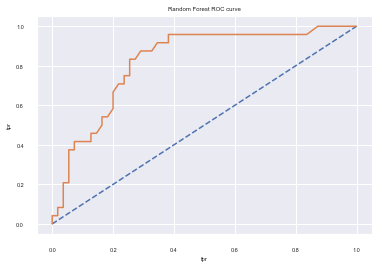

In [392]:
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()

### K Nearest Neighbour

In [393]:
from sklearn.neighbors import KNeighborsClassifier

## creating the random forest model
KNN_model = KNeighborsClassifier(n_neighbors=5)

## train the model
KNN_model.fit(x_train, y_train)


## making prediction
KNN_pred = KNN_model.predict(x_test)

## getting our results
KNN_f1 = f1_score(y_test, KNN_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)

## printing the classification report
print(classification_report(y_test, KNN_pred))

## showing the feature importance to the predictions
KNN_prem = PermutationImportance(KNN_model, random_state=0).fit(x_test, y_test)
eli5.show_weights(KNN_prem, feature_names = x_test.columns.tolist())

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        55
           1       0.58      0.58      0.58        24

    accuracy                           0.75        79
   macro avg       0.70      0.70      0.70        79
weighted avg       0.75      0.75      0.75        79



Weight,Feature
0.0734 ± 0.0838,age_group
0.0278 ± 0.0436,Glucose
0.0228 ± 0.0189,number_preg
0.0127 ± 0.0392,Pregnancies
0.0101 ± 0.0101,glucose_insulin_ratio
0.0076 ± 0.0124,DiabetesPedigreeFunction
0.0025 ± 0.0295,glucose_and_DPF
-0.0000 ± 0.0226,BloodPressure
-0.0051 ± 0.0304,age_and_DPF
-0.0076 ± 0.0258,Insulin


### ROC Curve for KNN

In [394]:
from sklearn.metrics import roc_curve
y_pred_proba = KNN_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

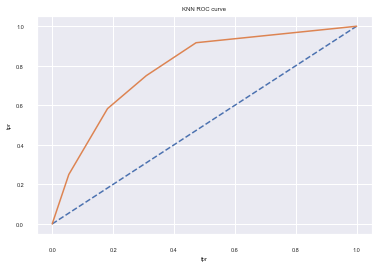

In [395]:
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC curve')
plt.show()

### K Means Clustering

### Elbow Method

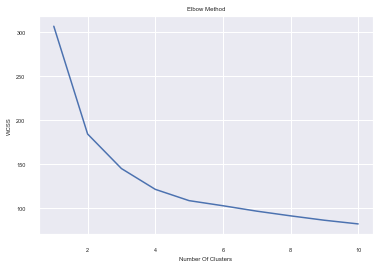

In [396]:
from sklearn.cluster import KMeans

## elbow metthod to find n clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette method

In [397]:
from yellowbrick.cluster import KElbowVisualizer

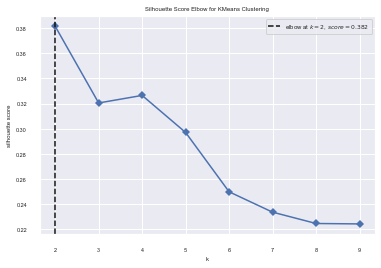

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [398]:
# check the sillhouette score

##Instantiating a scikit-learn K-Means model
model = KMeans(random_state=0)

## Instantiating the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)

## fit the data and visualize
visualizer.fit(x_scaled)
visualizer.poof()

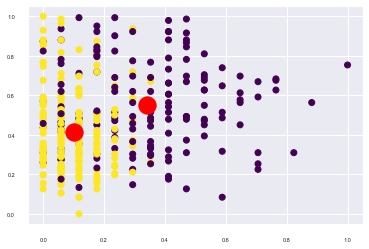

1.147151848830986

In [399]:
#applying kmeans algorith
import sklearn
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(x_scaled)
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y_pred,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
#calculating davies bouldin score
sklearn.metrics.davies_bouldin_score(x_scaled,y_pred)

### Aglomerative Clustering

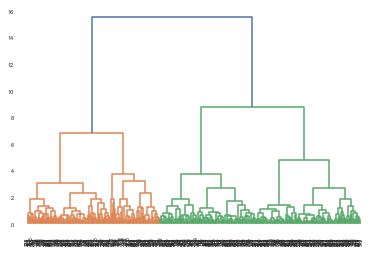

In [400]:
## Hierarchial clustering--- Dendogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as pylab

dendogram = sch.dendrogram(sch.linkage(x_scaled, method='ward'))

1.1646363350749205

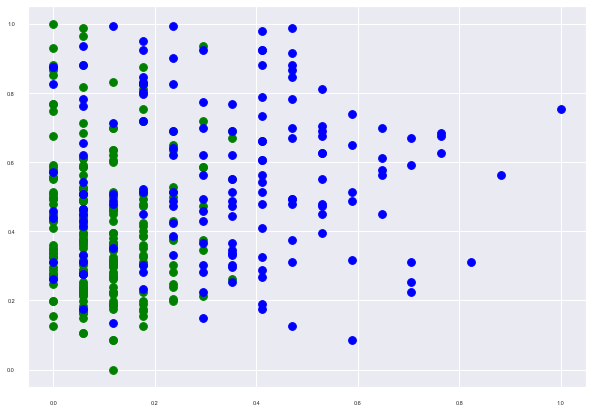

In [401]:
## applying aglomerative clustering method
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit_predict(x_scaled)

labels = model.labels_
## plotting the scatter plot using clusters
plt.figure(figsize=(10, 7))
plt.scatter(x_scaled[labels==0, 0], x_scaled[labels==0, 1], s=60, marker='o', color='green')
plt.scatter(x_scaled[labels==1, 0], x_scaled[labels==1, 1], s=60, marker='o', color='blue')
sklearn.metrics.davies_bouldin_score(x_scaled,labels)

### Deep Learning Approach

In [402]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# # from keras.layers import Dense,  Dropout
# from tensorflow.keras.losses import binary_crossentropy

In [403]:
# ## setting our seed
# seed = 10
# tf.random.set_seed(seed)

# # tf.reshape(x_train, [25, 25])

# import numpy as np

# # x_train=np.reshape(x_train, (-1, 28*28))


# ## Keras Sequential model
# model = keras.Sequential([
#     layers.Dense(32, activation="relu", input_shape=[16]),
#     Dropout(0.2),
#     layers.Dense(32, activation="relu"),
#     Dropout(0.2),
#     layers.Dense(32, activation="relu"),
#     Dropout(0.2),
#     layers.Dense(1, activation="sigmoid")
# ])


# ## compile the model
# model.compile(
#     optimizer= 'adam',
#     loss = 'binary_crossentropy',
#     metrics=['binary_accuracy']
# )

# # including early stopping to prevent overfitting
# early_stopping = keras.callbacks.EarlyStopping(
#                 patience=10,
#                 min_delta= 0.001,
#                 restore_best_weights= True
#             )

# # x_train = x_train.reshape(-1, 28*28)
# # x_train = x_train.astype('float32') / 255

# ## train the model
# history = model.fit(
#         x_train, y_train,
#         validation_data = (x_test, y_test),
#         batch_size = 512,
#         epochs=1000,
#         callbacks= [early_stopping],
#         verbose = 0 ## hides the output because we have so many epochs
    
# )


In [404]:
# ## printing the training result
# history_data = pd.DataFrame(history.history)
# # start the plot at epoch 5
# history_data.loc[5:, ['loss', 'val_loss']].plot()
# history_data.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()


# print(("Best Validation Loss: {:0.4f}" +\
#       "\nBest Validation Accuracy: {:0.4f}")\
#       .format(history_data['val_loss'].min(), 
#               history_data['val_binary_accuracy'].max()))



In [405]:
# model.fit(
#     x_train, y_train,
#     validation_data=(x_test, y_test),
#     batch_size=512,
#     epochs=1000,
#     callbacks=[early_stopping],
#     verbose=0)

# # Making The predictions
# dnn_pred = model.predict(x_test)

# # changing the prediction from probabilities 0 to 1
# dnn_rounded = f1_score(y_test, dnn_rounded)
# dnn_auc = roc_auc_score(y_test,dnn_rounded)
# dnn_acc = accuracy_score(y_test,dnn_rounded)

# #printing the sklearn classification report
# print(classification_report(y_test,dnn_rounded))

### Final Result

In [406]:
results = [['Logistic Regression', round(log_r_f1,2), round(log_r_auc,2), round(log_r_acc,2)],
          ['Random Forest', round(rf_f1,2), round(rf_auc,2), round(rf_acc,2)],
          ['K Nearest Neighbors', round(KNN_f1,2), round(KNN_auc,2), round(KNN_acc,2)]]    


#defining header names
col_names = ["Model", "F1 Score", "ROC AUC", "Accuracy"]


#creating a results table
print(tabulate(results, headers=col_names))

Model                  F1 Score    ROC AUC    Accuracy
-------------------  ----------  ---------  ----------
Logistic Regression        0.67       0.76        0.8
Random Forest              0.57       0.69        0.73
K Nearest Neighbors        0.58       0.7         0.75
